In [64]:
import pandas as pd
import statistics as s
import scipy.stats as ss
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("salary.csv")

In [3]:
df.shape

(35, 2)

In [4]:
df.head()

,exp,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.salary.mean()

83945.6

In [6]:
df['salary'].median()

81363.0

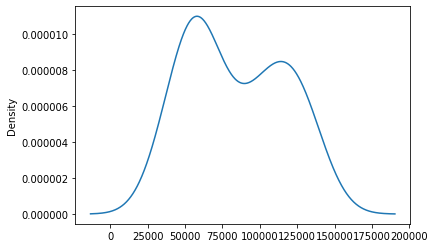

In [7]:
df.salary.plot.kde()

In [8]:
df.exp.mode()

0    3.2
1    4.0
dtype: float64

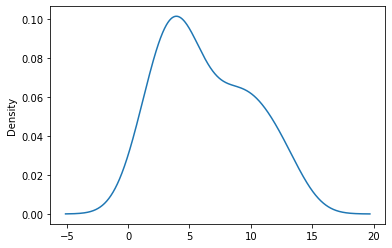

In [9]:
df.exp.plot.kde()

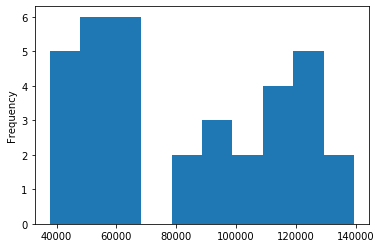

In [10]:
df.salary.plot.hist()

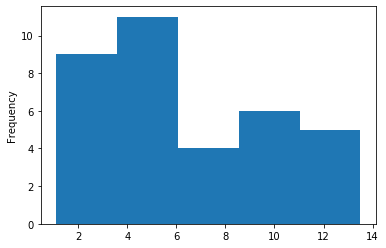

In [11]:
df['exp'].plot.hist(bins=5)

In [12]:
q1 = df.exp.quantile(.25)
q3 = df.exp.quantile(.75)

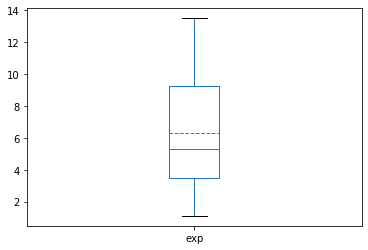

In [13]:
df.exp.plot.box(showmeans=True, meanline=True)

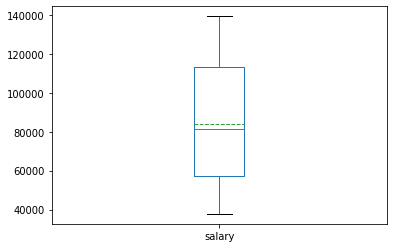

In [14]:
df.salary.plot.box(showmeans=True, meanline=True)

### Ages Examples

In [15]:
ages  = pd.Series([20,22,25,20,34,30,30,20,30,70,68])

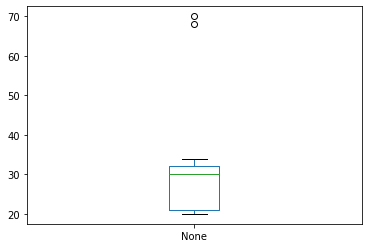

In [16]:
ages.plot.box()

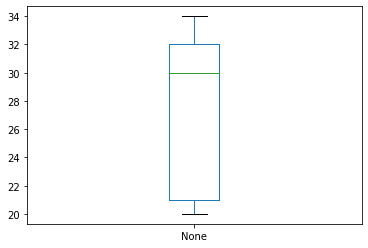

In [17]:
ages.plot.box(showfliers=False)

## Correlation 

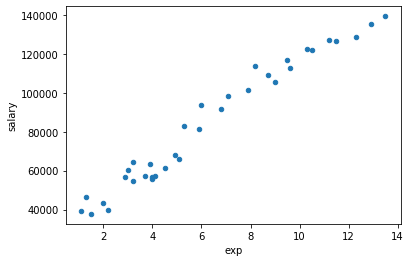

In [18]:
df.plot.scatter(x='exp',y='salary')

In [26]:
results = ss.pearsonr(df['exp'], df['salary'])
print(f"{results[0] * 100:.2f}, {results[1]*100:.2f}")

98.24, 0.00


In [20]:
salaries = pd.Series([200000,300000,500000,300000,250000])
ages = pd.Series([20,25,30,40,24])

In [21]:
persons =pd.DataFrame( {'salary': salaries, 'age' : ages})

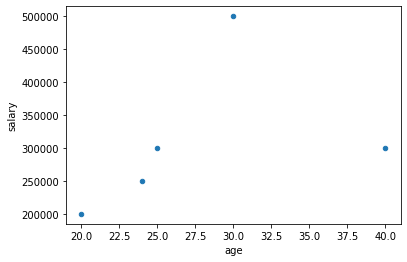

In [22]:
persons.plot.scatter(x = 'age', y = 'salary')

In [23]:
ss.pearsonr(persons['age'], persons['salary'])

(0.40181541321778125, 0.5025140084907671)

## Regression 

In [24]:
det = ss.linregress(df['exp'], df['salary'])

In [29]:
det

LinregressResult(slope=8731.941047062492, intercept=28859.526194531478, rvalue=0.9824272546479683, pvalue=1.2309905889928102e-25, stderr=288.78315746221443)

In [28]:
print(f"{det.pvalue:f}")

0.000000


In [30]:
exp = 4.5
salary = det.intercept + det.slope * exp
print(exp, salary)

4.5 68153.26090631269


In [32]:
pred_salary = []
for e in df['exp']:
    pred_salary.append(det.intercept + det.slope * e)

In [62]:
pred_salary - df['salary']

0      -878.338654
1     -5993.950444
2      4226.437765
3      2798.408289
4      8178.796498
5     -2459.844769
6     -5094.650664
7      2356.737545
8     -7643.262455
9      3978.708069
10     -303.903722
11     7993.290383
12     6830.290383
13     7579.484487
14     7042.260906
15     3708.037325
16     7363.425535
17    -7949.186256
18     -985.021628
19   -12688.827523
20    -3501.274685
21    -7416.692371
22    -3460.139534
23   -13350.557220
24    -4603.586696
25     1864.995618
26    -5156.033858
27       51.160246
28    -3592.481021
29    -1327.092811
30     -687.734078
31     2520.848236
32     7497.401073
33     5826.565702
34     7275.730330
Name: salary, dtype: float64

In [70]:
mse = ((pred_salary - df['salary']) ** 2).sum() / len(df)
print(math.floor(mse), math.floor(math.sqrt(mse)))

35006768 5916


In [ ]:
# standard error for graident
Formula : sqrt(sum(yi - ypredict) ** 2)/ (n-2) / sqrt(sum((xi - Xmean) ** 2)

In [46]:
diff =  df['salary'] - pred_salary

In [75]:
y_diff = math.sqrt((diff ** 2).sum() / (len(df)- 2))
y_diff

6093.307025620126

In [55]:
xmean = df['exp'].mean()

In [78]:
x_diff = math.sqrt(((df['exp'] - xmean) ** 2).sum())

In [79]:
y_sqrt / x_sqrt

288.78315746221296

In [77]:
df.head()

,exp,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [37]:
df['predicted'] = pred_salary

In [38]:
df

,exp,salary,predicted
0,1.1,39343,38464.661346
1,1.3,46205,40211.049556
2,1.5,37731,41957.437765
3,2.0,43525,46323.408289
4,2.2,39891,48069.796498
5,2.9,56642,54182.155231
6,3.0,60150,55055.349336
7,3.2,54445,56801.737545
8,3.2,64445,56801.737545
9,3.7,57189,61167.708069


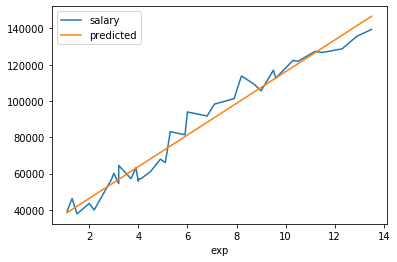

In [66]:
ax = plt.subplot()
df.plot.line(x='exp',y='salary',ax=ax)
df.plot.line(x='exp',y='predicted',ax=ax)